<a href="https://colab.research.google.com/github/HARSHIT097/Neural_networks/blob/main/aSSIGNMENT_Hmonktech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Name- Harshit Kumar Singh
#Position Applied For - Juniour Data Scientist
#e-mail - harshitsingh097@gmail.com
#MOBILE - 7800333757

# Abstract

The choice of Activation Functions (AF) has proven
to be an important factor that affects the performance of an Artificial Neural Network (ANN). 

Use a 1-hidden layer neural network model that adapts to the most suitable activation function according to the data-set. The ANN model can learn for itself the best AF to use by exploiting a flexible functional form,

k0 + k1 ∗ x 

with parameters k0, k1 being learned from multiple
runs.

You can use this code-base for implementation guidelines
and help. https://github.com/sahamath/MultiLayerPerceptron

# Background


Selection of the best performing AF for classification taskbis essentially a naive (or brute-force) procedure wherein, a popularly used AF is picked and used in the network for approximating the optimal function. If this function fails, the process is repeated with a different AF, till the network learns to approximate the ideal function.

 It is interesting to inquire and inspect whether there exists a possibility of building a framework which uses the inherent clues and insights from data and bring about the most suitable AF. The possibilities of such an approach could not only save significant time and
effort for tuning the model, but will also open up new ways for discovering essential features of not-so-popular AFs.

# Problem Statement

Given a specific activation function

g(x) = k0 + k1x (1)

and categorical cross-entropy loss, design a Neural Network on

Banknote, MNIST or IRIS data

where the activation function parameters k0, k1 are learned from the data you choose from
one of the above-mentioned data sets.

Your solution must include the learnable parameter values i.e. final k0, k1 values
at the end of training, a plot depicting changes in k0, k1 at
each epoch, training vs test loss, train vs. test accuracy and a
Loss function plot.

# MATHEMATICAL FRAMEWORK

III. MATHEMATICAL FRAMEWORK

A. Compact Representation
Let the proposed Ada-Act activation function be mathematically defined as:

g(x) = k0 + k1x (2)

where the coefficients k0, k1 have to be learned during training
via back-propagation of error gradients, on a particular data
set specified in the problem statement.


For the purpose of demonstration, consider a feed-forward
neural network consisting of an input layer L0 consisting
of m nodes for m features, two hidden layers L1 and L2
consisting of n and p nodes respectively, and an output
layer L3 consisting of k nodes for k classes. Let zi and
ai denote the inputs to and the activations of the nodes in
layer Li respectively. Let wi and bi denote the weights and
the biases applied to the nodes of layer Li−1, and let the
activations of layer L0 be the input features of the training
examples. Finally, let K denote the column matrix containing
the equation coefficients: 

k0
k1
k2


and let t denote the number of
training examples being taken in one batch. Then the forwardpropagation equations will be:

z1 = a0 × w1 + b1

a1 = g(z1)

z2 = a1 × w2 + b2

a2 = g(z2)

z3 = a2 × w3 + b3

a3 = Sof tmax(z3)

where × denotes the matrix multiplication operation and
Sof tmax() denotes the Softmax activation function.
For back-propagation, let the loss function used in this
model be the Categorical Cross-Entropy Loss, and let dfi
denote the gradient matrix of the loss with respect to the matrix

fi

, where f can be substituted with z, a, b, or w. and let there
be matrices dK2 and dK1 of dimension 3×1. Then the backpropagation equations will be:

dz3 = a3 − y

dw3 =
1
t
a
T
2 × dz3

db3 = avgcol(dz3)

da2 = dz3 × w
T
3

dz2 = g
0
(z2) ∗ da2

dw2 =
1
t
a
T
1 × dz2

db2 = avgcol(dz2)

da1 = dz2 × w
T
2

dz1 = g
0
(z1) ∗ da1

dw1 =
1
t
a
T
0 × dz1

db1 = avgcol(dz1)

dK1 =



avge(da1)
avge(da1 ∗ z1)
avge(da1 ∗ z
2
1
)


 (3)

dK = dK1 (4)

where ∗ is the element-wise multiplication operation, T is the
matrix transpose operation, avgcol(x) is the function which
returns the column-wise average of the elements present in
the matrix x, and avge(x) is the function which returns the
average of all the elements present in the matrix x.
Consider the learning rate of the model to be α. The update
equations for the model parameters will be:

w1 = w1 − α.dw1

b1 = b1 − α.db1

w2 = w2 − α.dw2

b2 = b2 − α.db2

w3 = w3 − α.dw3

b3 = b3 − α.db3

K = K − α.dK

# EXPECTED RESULTS 


• A technical report containing implementation details (algorithm, initial settings such as sampling the parameters
k0, k1 from some distribution, parameter updates on
epochs, final parameter values at the end of training, train
vs test loss, train and test accuracy, F1-Score, plot of
the loss function vs. epochs, Code base hosted on github
linked in the report)–Maximum 3 pages

• Grid search/brute force NOT allowed


• Data Sets for experiments and results: Bank-Note
(Internship Candidates)

• Data Sets for experiments and results: Bank-Note, Iris,
MNIST (Junior Data Scientist Positions)

# Solution

The Solution consist of two experiments.

Experiment-001 and Experiment-002

The first experiment is with the iris dataset and second one is with the mnist dataset


## experiments-001

Defining Class and function

In [ ]:
class exp_001():
  def Train_Test_Split(self,X,y):

    X_train,X_val,Y_train,Y_val=train_test_split(X,y,test_size=0.25,random_state=2)
    print("x_train shape",X_train.shape)
    print("x_test shape",X_val.shape)
    print("y_train shape",Y_train.shape)
    print("y_test shape",Y_val.shape)
    return X_train,X_val,Y_train,Y_val

  def plot_result(self,df):
    fig,(ax1, ax2)=plt.subplots(1,2,figsize=(10,5))
    # ax=[axx for axes_rows in axes for axx in axes_rows]
    
    ax1.plot(df.index,df.loss, label='loss',color="g")
    ax1.plot(df.index,df.val_loss, label='val_loss',color="r")
    ax1.set_title("Loss")
    ax1.legend()

    ax2.plot(df.index,df.accuracy, label='accuracy',color="g")
    ax2.plot(df.index,df.val_accuracy, label='val_accuracy',color="r")
    ax2.set_title("Accuracy")
    ax2.legend()

    plt.tight_layout()
    plt.show()
    return

In [ ]:
obj = exp_001()

### loading libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### loading dataset

In [ ]:
#choosing iris datset for experiment
from sklearn.datasets import load_iris
iris_data = load_iris()

features = iris_data.data
labels = iris_data.target.reshape(-1, 1)

### Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# we have 3 classes so the labels will have 3 values
# first class: (1,0,0) second class: (0,1,0) third class: (0,0,1)
encoder = OneHotEncoder()
targets = encoder.fit_transform(labels).toarray()

### train test split

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2)

### model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(Dense(10, input_dim=4, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.summary()

#print(model.weights)
# we can define the loss function MSE or negative log lokelihood
# optimizer will find the right adjustements for the weights: SGD, Adagrad, ADAM ...
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


CALLBACKS = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_features,
                    train_targets,
                    epochs=10,
                    validation_data=(test_features, test_targets),
                    callbacks=[CALLBACKS],
                    batch_size=20, verbose=2)
results = model.evaluate(test_features, test_targets, use_multiprocessing=True)

print("Training is finished... The loss and accuracy values are:")
print(results)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6/6 - 13s - loss: 1.2344 - accuracy: 0.6500 - val_loss: 1.1107 - val_accuracy: 0.7333
Epoch 2/10
6/6 - 0s - loss: 1.2130 - accuracy: 0.6500 - val_loss: 1.0981 - val_accuracy: 0.7333
Epoch 3/10
6/6 - 0s - loss: 1.1933 - accuracy: 0.6500 - val_loss: 1.0862 - val_accuracy: 0.7333
Epoch 4/10
6/6 - 0s - loss: 1.1751 - accuracy: 0.6417 - val_loss: 1.0752 - val_accuracy: 0.7333
Epoch 5/10
6/6 - 0s - loss: 1.1551 - accuracy: 0.6333 - val_loss: 1.0660 - val_accuracy: 0.7333
Epoch 6/10
6/6 - 0s - loss: 1.1425 - ac

In [ ]:
#print(model.weights)

In [ ]:
results=pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,1.234419,0.650000,1.110730,0.733333
1,1.212992,0.650000,1.098126,0.733333
2,1.193283,0.650000,1.086198,0.733333
3,1.175102,0.641667,1.075210,0.733333
4,1.155099,0.633333,1.065968,0.733333


## Visualization of loss and accuracy

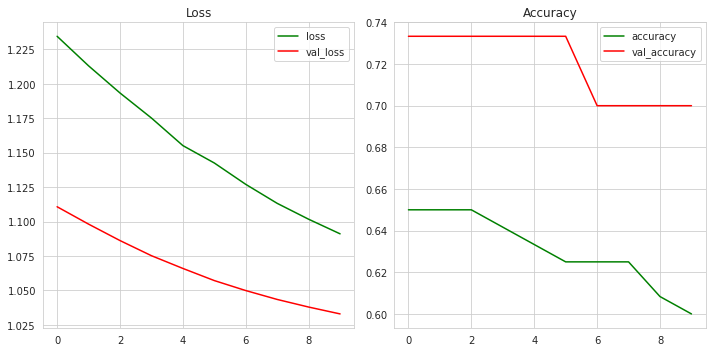

In [ ]:
obj.plot_result(results)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = scaler.fit_transform(features)

In [ ]:
inputs

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
targets.shape

(150, 3)

# experiment-002

## Import Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [ ]:
Random_State=2020

#Defining functions

-- loading data

-- preprocesiing

-- visulaization

-- evaluation metrics/results

-- creating model

In [ ]:
def Import_Data():
    # df=pd.read_csv("DNN_fashion_MNIST/fashion-mnist_train.csv")
    train_df=pd.read_csv("https://raw.githubusercontent.com/HARSHIT097/Neural_networks/main/MNIST_CSV/mnist_test.csv",
                         nrows=10000,dtype=np.int32)
    return train_df

def Min_Max_Norm(X):
    temp=X.values/255
    return pd.DataFrame(temp,columns=X.columns)

def Train_Test(X,y):
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=Random_State)
    X_train=X_train.astype("float32")
    X_test=X_test.astype("float32")
    X_train/=255.0
    X_test/=255.0

    return X_train,X_test,y_train,y_test

Result_df=pd.DataFrame(columns=["Dimension of hidden layer","Learning Rate","Regularization","n_Epoch",
                                "Train_Accuracy","Test Accuracy","Comment"])

#To store result in the dataframe
def Save_Result(hidden_layer,Learning_Rate,Regularization,n_Epoch,Train_Accuracy,Test_Accuracy):
    global Result_df
    Remark=input("Please Enter Remark : ")
    result={"Dimension of hidden layer":hidden_layer,"Learning Rate":Learning_Rate,
            "Regularization":Regularization,"n_Epoch":n_Epoch,
                                "Train_Accuracy":Train_Accuracy,
                                "Test Accuracy":Test_Accuracy,"Comment":Remark}
    Result_df=Result_df.append(result,ignore_index=True)
    print("Data Saved")
    return True

def Plot_Data(X):
    num = 10
    images = X.iloc[:10,1:]
    labels = X.iloc[:10,0]
    num_row = 2
    num_col = 5
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        img=np.reshape(X.iloc[i,1:].to_list(),(28,28))
        ax = axes[i//num_col, i%num_col]
        ax.imshow(img, cmap='gray')
        ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()
    return 


def Show_Loss_Graph(loss):
    keys=list(loss.keys())
    values=list(loss.values())
    plt.xlabel("n Epoch")
    plt.ylabel("Loss")
    print("Starting Loss : ",values[0])
    print("Ending Loss :",values[-1])
    sns.lineplot(x=keys,y=values)
    return

def Predict_Result(model,X):
    
    #Input X 
    #Model
    
    W1,B1,W2,B2,W3,B3,W4,B4=model["W1"],model["B1"],model["W2"],model["B2"],model["W3"], \
                            model["B3"],model["W4"],model["B4"]
    #Layer 1
    Z1=X.dot(W1)+B1
    A1=np.tanh(Z1)
    
    #Layer 2
    Z2=A1.dot(W2)+B2
    A2=np.tanh(Z2)
    
    #Layer 3
    Z3=A2.dot(W3)+B3
    A3=np.tanh(Z3)
    
    #Layer 4
    Z4=A3.dot(W4)+B4
    Z4=np.exp(Z4)
    proba=Z4/np.sum(Z4,axis=1,keepdims=True)

    return np.argmax(proba,axis=1)
  
def Calculate_Accuracy_Update(model_,X_,y_):
    X=X_.copy()
    y=y_.copy()
    
    y_hat=Predict_Result(model_,X)

    Accuracy=accuracy_score(y,y_hat)

    X=pd.DataFrame(X,columns=features[1:])
    X["y"]=y
    X["y_hat"]=y_hat
    
    print("Accuracy : ",Accuracy )

    print(confusion_matrix(y,y_hat)) 

    return X,Accuracy

def Calculate_Loss_Function(model,X,y):
    # Function to calculate loss on whole dataset
#     print(y)
    W1,B1,W2,B2,W3,B3,W4,B4=model["W1"],model["B1"],model["W2"],model["B2"],model["W3"], \
                            model["B3"],model["W4"],model["B4"]
    
    #Layer 1
    Z1=X.dot(W1)+B1
    A1=np.tanh(Z1)
    
    #Layer 2
    Z2=A1.dot(W2)+B2
    A2=np.tanh(Z2)
    
    #Layer 3
    Z3=A2.dot(W3)+B3
    A3=np.tanh(Z3)
    
    #Layer 4
    Z4=A3.dot(W4)+B4
    Z4=np.exp(Z4)
    A4=Z4/np.sum(Z4,axis=1,keepdims=True)
    
    #output Layer -> Softmax
    exp_op=np.exp(A4)
    
    #To calculate probabilities
    proba=exp_op/np.sum(exp_op,axis=1,keepdims=True)
    
    #Calculate Correct loss 
    y=y.astype(int)
    log_proba=-np.log(proba[range(count),y])

    loss=np.sum(log_proba)
    
    #
    loss+=(lambda_/2) *(np.sum(np.square(W1))+
                        np.sum(np.square(W2))+
                        np.sum(np.square(W3))+
                        np.sum(np.square(W4)))
    loss/=count
    return loss

def Drop_Out_Forword(Layers,Keep_prob=1):
    if Keep_prob>0.0:
        Drop_Out_L=np.random.randn(Layers.shape[1],Layers[0])/np.sqrt(Layers[0])
        Drop_Out_L=(Drop_Out_L<Keep_prob).astype(np.float)
        Layers*=Drop_Out
        Layers/=Keep_prob
    return Layers,Drop_Out_L
def Drop_Out_Backword(Diff_Layers,Drop_Out,Keep_prob=1):
    if keep_Prob>0:
        Diff_Layers*=Drop_Out
        Diff_Layers/=keep_Prob
    return Diff_Layers

def Create_Mini_Batches(Batch_Size,X,y):
    # print("Mini-Batch In")
    y=y.reshape(y.shape[0],1)
    Mini_Batches = [] 
    Data = np.hstack((X, y))
    np.random.shuffle(Data) 
    n_minibatches = Data.shape[0] // Batch_Size 
    i = 0
    for i in range(n_minibatches + 1): 
        mini_batch = Data[i * Batch_Size:(i + 1)*Batch_Size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1] 
        # print(X_mini)
        # print(Y_mini)
        
        Mini_Batches.append((X_mini, Y_mini))
        # print("Batch Created") 
    if Data.shape[0] % Batch_Size != 0: 
        mini_batch = Data[i * Batch_Size:Data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1] 
        Mini_Batches.append((X_mini, Y_mini)) 
    # print("Mini-Batch Clear")
    return Mini_Batches 

def Train_Model(Layers,Model,X,y,Epoch=1000,Batch_Size=32,Print_Loss=False):
    
    np.random.seed(Random_State)
    
    if Model==None:
        W1=np.random.randn(X.shape[1],Layers[0])/np.sqrt(Layers[0])
        B1=np.zeros((1,Layers[0]))
        
        W2=np.random.randn(Layers[0],Layers[1])/np.sqrt(Layers[1])
        B2=np.zeros((1,Layers[1]))
        
        W3=np.random.randn(Layers[1],Layers[2])/np.sqrt(Layers[2])
        B3=np.zeros((1,Layers[2]))
        
        W4=np.random.randn(Layers[2],Layers[3])/np.sqrt(Layers[3])
        B4=np.zeros((1,Layers[3]))
        
    else : 
        W1,B1,W2,B2,W3,B3,W4,B4=Model["W1"],model["B1"],model["W2"],model["B2"],model["W3"], \
                            model["B3"],model["W4"],model["B4"]
    

    assert((X.shape[1],Layers[0])==W1.shape)
    "Shape of X={} does not match with W1={}".format((X.shape[1],Layers[0]),W1.shape)
    Model={}
    
    for i in range(Epoch):
        
        
        Mini_Batches = Create_Mini_Batches(Batch_Size,X, y)
        for mini_batch in Mini_Batches:
            Min_X,Min_Y=mini_batch
            
            if len(Min_X)!=Batch_Size:
                break

            ########### Forward Propagation ###########
            #Layer 1
            Z1=Min_X.dot(W1)+B1
            A1=np.tanh(Z1)
            assert(Z1.shape==A1.shape) ,"Shape of Z1 and A1 does not match"

            #Layer 2
            Z2=A1.dot(W2)+B2
            A2=np.tanh(Z2)
            assert(Z2.shape==A2.shape) ,"Shape of Z2 and A2 does not match"


            #Layer 3
            Z3=A2.dot(W3)+B3
            A3=np.tanh(Z3)
            assert(Z3.shape==A3.shape), "Shape of Z3 and A3 does not match"


            #Layer 4
            Z4=A3.dot(W4)+B4
            Z4=np.exp(Z4)
            proba=Z4/np.sum(Z4,axis=1,keepdims=True)
            assert(Z4.shape==proba.shape) ,"Shape of Z4 and proba does not match"


            ########### Backward Propagation ###########
            #Layer 4
            dZ4=proba
  
            Min_Y=Min_Y. astype(int)
            dZ4[range(Batch_Size),Min_Y]-=1

            dW4=(1/Batch_Size)*(A3.T).dot(dZ4)

            assert(dW4.shape==W4.shape) ,"Shape of dW4={} and W4={} does not match".format(dW4.shape, W4.shape)

            dB4=(1/Batch_Size)*np.sum(dZ4,axis=0,keepdims=True)

            #Layer 3
            dA3=dZ4.dot(W4.T)

            dZ3=dA3*(1-A3**2)

            dW3=(1/Batch_Size)*(A2.T).dot(dZ3)
            assert(dW3.shape==W3.shape) ,"Shape of dW3 and W3 does not match"


            dB3=(1/Batch_Size)*np.sum(dZ3,axis=0,keepdims=0)

            # Layer 2

            dA2=dZ3.dot(W3.T)

            dZ2=dA2*(1-A2**2)

            dW2=(1/Batch_Size)*(A1.T).dot(dZ2)

            assert(dW2.shape==W2.shape), "Shape of dW2 and W2 does not match"


            dB2=(1/Batch_Size)*np.sum(dZ2,axis=0,keepdims=0)

            # Layer 1

            dA1=dZ2.dot(W2.T)

            dZ1=dA1*(1-A1**2)

            dW1=(1/Batch_Size)*(Min_X.T).dot(dZ1)

            assert(dW1.shape==W1.shape), "Shape of dW1 and W1 does not match"

            dB1=(1/Batch_Size)*np.sum(dZ1,axis=0,keepdims=0)



            # Regularization

            dW4+=lambda_*dW4
            dW3+=lambda_*dW3
            dW2+=lambda_*dW2
            dW1+=lambda_*dW1

            #Gradient Descent

            W4-=Learning_Rate*dW4
            W3-=Learning_Rate*dW3
            W2-=Learning_Rate*dW2
            W1-=Learning_Rate*dW1


            # set model values 

        Model={"W4":W4,"B4":B4,
            "W3":W3,"B3":B3,
            "W2":W2,"B2":B2,
            "W1":W1,"B1":B1
              }
        if Print_Loss and i%50==0:
            loss=Calculate_Loss_Function(Model,X,y)
            print("Loss after %i epoch is %f"%(i,loss))

            loss_dict[i]=loss
    
    loss=Calculate_Loss_Function(Model,X,y)
    print("Loss after %i epoch is %f"%(i,loss))

    loss_dict[i]=loss
    
    return Model 

def Main():
    Model=None
    model=Train_Model(Layers,Model,X_train.values,y_train.values,Epoch,
                      Batch_Size=32,Print_Loss=True)
    print("Loss Graph")
    Show_Loss_Graph(loss_dict)
    print("Training Data")
    train_y_pred,train_acc=Calculate_Accuracy_Update(model,X_train.values,y_train.values)
    print("Testing Data")
    test_y_pred,test_acc=Calculate_Accuracy_Update(model,X_test.values,y_test.values)
    

    Save_Result(Layers,Learning_Rate,lambda_,Epoch,train_acc,test_acc)


In [ ]:
MNIST_Data=Import_Data()

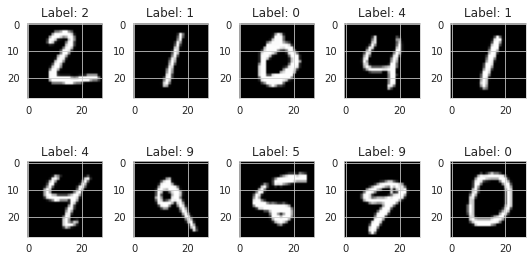

In [ ]:
Plot_Data(MNIST_Data)

In [ ]:
X_train,X_test,y_train,y_test =Train_Test(MNIST_Data.iloc[:,1:],MNIST_Data.iloc[:,0])

## Experiment with parameters

Loss after 0 epoch is 2.294639
Loss after 29 epoch is 2.102721
Loss Graph
Starting Loss :  2.2946394630125218
Ending Loss : 2.102720891934031
Training Data
Accuracy :  0.4248031003875484
[[502   0   0  35   4  38 215   0   0   2]
 [  1 887   1  19   0   4   0   0   8   2]
 [ 44  61   0 542  18  59  34   8  21  25]
 [ 12  36   1 635   8  43  10   2  12  12]
 [ 35  29   0   0 436   2  34 103   2 130]
 [114  15   1 313  12 171  82   6   4  10]
 [452   6   2  19  17  75 200   1   0   4]
 [ 11  63   0   7 449   0  14  70   2 204]
 [ 37 131   0 477   7  31  21   4  39  35]
 [ 22  16   0   7 247   5  13  52   1 458]]
Testing Data
Accuracy :  0.4235
[[114   0   0   5   1   9  55   0   0   0]
 [  1 205   0   3   0   1   0   0   3   0]
 [ 11  19   0 141   7  20   8   3   2   9]
 [  4  13   0 192   1  15   5   0   4   5]
 [  8   9   0   0 132   0  11  23   0  28]
 [ 34   1   0  62   2  39  21   2   1   2]
 [113   1   0   3   3  17  43   1   0   1]
 [  1  20   0   0 109   0   3  15   1  58]
 [ 10 

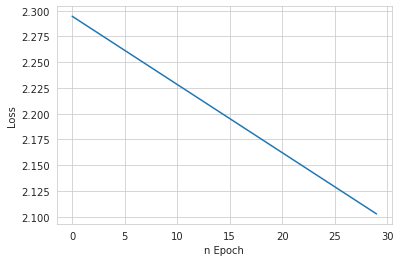

In [ ]:
# Updated 
features=MNIST_Data.columns
loss_dict={}
count=len(X_train)
Layers=[5,5,4,10]
Learning_Rate=0.01
lambda_=0.0
Epoch=30
Main()

Loss after 0 epoch is 2.294639
Loss after 29 epoch is 2.102721
Loss Graph
Starting Loss :  2.2946394630125218
Ending Loss : 2.1027208919340312
Training Data
Accuracy :  0.4248031003875484
[[502   0   0  35   4  38 215   0   0   2]
 [  1 887   1  19   0   4   0   0   8   2]
 [ 44  61   0 542  18  59  34   8  21  25]
 [ 12  36   1 635   8  43  10   2  12  12]
 [ 35  29   0   0 436   2  34 103   2 130]
 [114  15   1 313  12 171  82   6   4  10]
 [452   6   2  19  17  75 200   1   0   4]
 [ 11  63   0   7 449   0  14  70   2 204]
 [ 37 131   0 477   7  31  21   4  39  35]
 [ 22  16   0   7 247   5  13  52   1 458]]
Testing Data
Accuracy :  0.4235
[[114   0   0   5   1   9  55   0   0   0]
 [  1 205   0   3   0   1   0   0   3   0]
 [ 11  19   0 141   7  20   8   3   2   9]
 [  4  13   0 192   1  15   5   0   4   5]
 [  8   9   0   0 132   0  11  23   0  28]
 [ 34   1   0  62   2  39  21   2   1   2]
 [113   1   0   3   3  17  43   1   0   1]
 [  1  20   0   0 109   0   3  15   1  58]
 [ 10

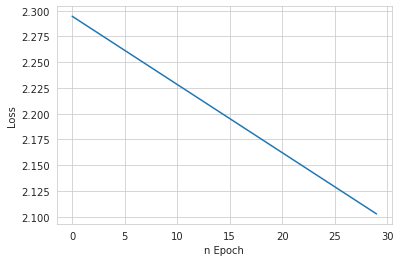

In [ ]:
# Updated 
features=MNIST_Data.columns
loss_dict={}
count=len(X_train)
Layers=[5,5,4,10]
Learning_Rate=0.01
lambda_=0.0
Epoch=30
Main()

Loss after 0 epoch is 2.271519
Loss after 50 epoch is 1.695330
Loss after 100 epoch is 1.618874
Loss after 150 epoch is 1.584737
Loss after 199 epoch is 1.564584
Loss Graph
Starting Loss :  2.2715188806511097
Ending Loss : 1.5645837208160087
Training Data
Accuracy :  0.9398674834354295
[[780   0   2   0   0   1   7   1   2   3]
 [  0 908   0   4   0   3   3   0   3   1]
 [  6   2 761   3  13   1   7   8  11   0]
 [  0   0  15 714   0  18   2   7  11   4]
 [  1   3   1   0 716   0   9   0   3  38]
 [  8   1   1  28   0 646  10   2  29   3]
 [  1   0   3   1   2   5 764   0   0   0]
 [  0   7   8   4   1   0   0 743   1  56]
 [  4   2  11  13   2  15   5   3 723   4]
 [  4   0   0   7  17   6   0  18   6 763]]
Testing Data
Accuracy :  0.862
[[170   0   3   0   0   2   8   1   0   0]
 [  0 207   1   1   0   1   0   0   2   1]
 [  4   2 183   3   5   1   9   4   7   2]
 [  1   1   8 200   0  13   0   7   9   0]
 [  0   0   1   0 182   0  10   0   1  17]
 [  6   2   4  23   1 117   3   0   

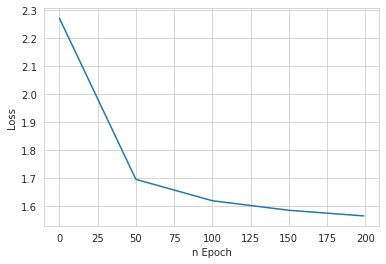

In [ ]:
#Batch 32 
features=MNIST_Data.columns
loss_dict={}
count=len(X_train)
Layers=[8,10,15,10]
Learning_Rate=0.01
lambda_=0.01
Epoch=200
Main()

# Results Summary

In [ ]:
Result_df

,Dimension of hidden layer,Learning Rate,Regularization,n_Epoch,Train_Accuracy,Test Accuracy,Comment
0,"[5, 5, 4, 10]",0.01,0.00,30,0.424803,0.4235,Test-1
1,"[5, 5, 4, 10]",0.01,0.00,30,0.424803,0.4235,Test-2
2,"[8, 10, 15, 10]",0.01,0.01,200,0.939867,0.8620,Test-3
3,"[5, 5, 4, 10]",0.01,0.00,30,0.424803,0.4235,Test-4
4,"[8, 10, 15, 10]",0.01,0.01,200,0.939867,0.8620,test-5
